In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans

In [2]:
data = pd.read_csv('Mall_Customers.csv')

In [3]:
data.head()

,CustomerID,Genre,Age,Income,SpendingScore
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
x = data['Income']
y = data['SpendingScore']

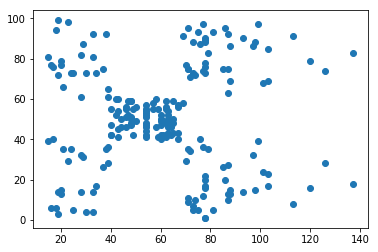

In [5]:
plt.scatter(x,y)
plt.show()

# Clustering

In [7]:
x=data.iloc[:, [3,4]].values

#using the elbow method to find the optimal number of clusters


In [8]:
ls=[]

for i in range (1,11):
    km=KMeans(n_clusters=i)
    km.fit(x)
    ls.append(km.inertia_) #sum of squared distances of samples to their closest cluster center
    


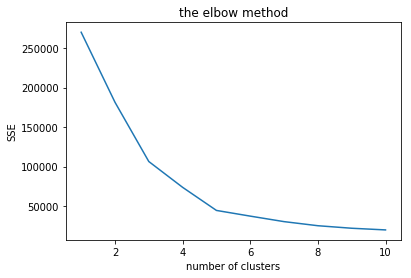

In [9]:
plt.plot(range(1,11),ls)
plt.title("the elbow method")
plt.xlabel("number of clusters")
plt.ylabel("SSE")
plt.show()


In [10]:
#fitting K-means to the dataset
km = KMeans(n_clusters=5)
y_kmeans = km.fit_predict(x)


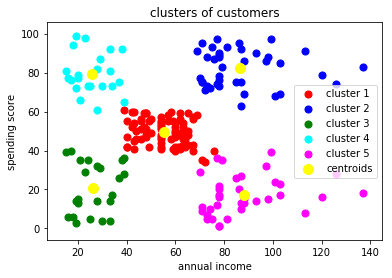

In [14]:
#visualising the clusters

plt.scatter(x[y_kmeans==0, 0], x[y_kmeans ==0, 1], s=50, c="red", label="cluster 1")

plt.scatter(x[y_kmeans==1, 0], x[y_kmeans ==1, 1], s=50, c="blue", label="cluster 2")

plt.scatter(x[y_kmeans==2, 0], x[y_kmeans ==2, 1], s=50, c="green", label="cluster 3")

plt.scatter(x[y_kmeans==3, 0], x[y_kmeans ==3, 1], s=50, c="cyan", label="cluster 4")

plt.scatter(x[y_kmeans==4, 0], x[y_kmeans ==4, 1], s=50, c="magenta", label="cluster 5")

plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], s=100, c="yellow", label="centroids")

plt.title("clusters of customers")
plt.xlabel("annual income")
plt.ylabel("spending score")
plt.legend()
plt.show()


In [12]:
y_kmeans

array([2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 0,
       2, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 4, 1, 0, 1, 4, 1, 4, 1,
       0, 1, 4, 1, 4, 1, 4, 1, 4, 1, 0, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1,
       4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1,
       4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1,
       4, 1])

In [15]:
kmeansdf = pd.DataFrame(y_kmeans)

In [19]:
kmeansdf.columns=['Kmeans']

In [21]:
kmeansdf.head()

,Kmeans
0,2
1,3
2,2
3,3
4,2


In [22]:
data['Kmeans'] = kmeansdf

In [24]:
data.head()

,CustomerID,Genre,Age,Income,SpendingScore,Kmeans
0,1,Male,19,15,39,2
1,2,Male,21,15,81,3
2,3,Female,20,16,6,2
3,4,Female,23,16,77,3
4,5,Female,31,17,40,2


# Hierarchical Clustering

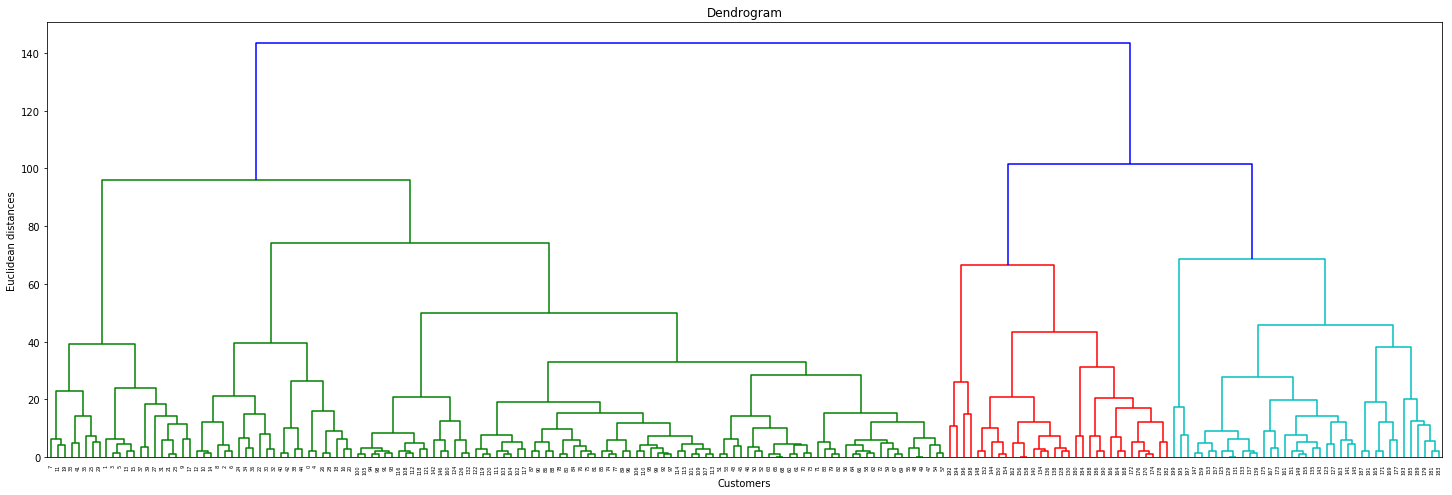

In [30]:
# Using the dendogram to find the optimal number of clusters

import scipy.cluster.hierarchy as sch

plt.figure(figsize= (25,8))
dendrogram = sch.dendrogram(sch.linkage(x, method = 'complete'))

plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

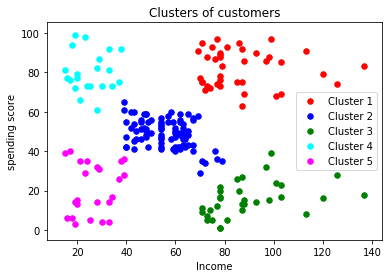

In [32]:
# Fitting Hierarchical Clustering to the dataset

from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'complete')

y_hc = hc.fit_predict(x)

# Visulising the clusters

plt.scatter(x[y_hc == 0,0], x[y_hc == 0,1], s = 30, c = 'red', label = 'Cluster 1')
plt.scatter(x[y_hc == 1,0], x[y_hc == 1,1], s = 30, c = 'blue', label = 'Cluster 2')
plt.scatter(x[y_hc == 2,0], x[y_hc == 2,1], s = 30, c = 'green', label = 'Cluster 3')
plt.scatter(x[y_hc == 3,0], x[y_hc == 3,1], s = 30, c = 'cyan', label = 'Cluster 4')
plt.scatter(x[y_hc == 4,0], x[y_hc == 4,1], s = 30, c = 'magenta', label = 'Cluster 5')


plt.title('Clusters of customers')
plt.xlabel('Income')
plt.ylabel("spending score")
plt.legend()
plt.show()

In [33]:
hc.labels_

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 2, 0, 2, 0,
       1, 0, 2, 0, 2, 0, 2, 0, 2, 0, 1, 0, 2, 0, 1, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 1, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0], dtype=int64)